<a href="https://colab.research.google.com/github/arthurflor23/handwritten-text-recognition/blob/master/src/tutorial.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

<img src="https://github.com/arthurflor23/handwritten-text-recognition/blob/master/doc/image/header.png?raw=true" />

# Handwritten Text Recognition using TensorFlow 2.x

This tutorial shows how you can use the project [Handwritten Text Recognition](https://github.com/arthurflor23/handwritten-text-recognition) in your Google Colab.



## 1 Localhost Environment

We'll make sure you have the project in your Google Drive with the datasets in HDF5. If you already have structured files in the cloud, skip this step.

### 1.1 Datasets

The datasets that you can use:

a. [Bentham](http://transcriptorium.eu/datasets/bentham-collection/)

b. [IAM](http://www.fki.inf.unibe.ch/databases/iam-handwriting-database)

c. [Rimes](http://www.a2ialab.com/doku.php?id=rimes_database:start)

d. [Saint Gall](http://www.fki.inf.unibe.ch/databases/iam-historical-document-database/saint-gall-database)

e. [Washington](http://www.fki.inf.unibe.ch/databases/iam-historical-document-database/washington-database)

### 1.2 Raw folder

On localhost, download the code project from GitHub and extract the chosen dataset (or all if you prefer) in the **raw** folder. Don't change anything of the structure of the dataset, since the scripts were made from the **original structure** of them. Your project directory will be like this:

```
.
├── raw
│   ├── bentham
│   │   ├── BenthamDatasetR0-GT
│   │   └── BenthamDatasetR0-Images
│   ├── iam
│   │   ├── ascii
│   │   ├── forms
│   │   ├── largeWriterIndependentTextLineRecognitionTask
│   │   ├── lines
│   │   └── xml
│   ├── rimes
│   │   ├── eval_2011
│   │   ├── eval_2011_annotated.xml
│   │   ├── training_2011
│   │   └── training_2011.xml
│   ├── saintgall
│   │   ├── data
│   │   ├── ground_truth
│   │   ├── README.txt
│   │   └── sets
│   └── washington
│       ├── data
│       ├── ground_truth
│       ├── README.txt
│       └── sets
└── src
    ├── data
    │   ├── evaluation.py
    │   ├── generator.py
    │   ├── preproc.py
    │   ├── reader.py
    │   ├── similar_error_analysis.py
    ├── main.py
    ├── network
    │   ├── architecture.py
    │   ├── layers.py
    │   ├── model.py
    └── tutorial.ipynb

```

After that, create virtual environment and install the dependencies with python 3 and pip:

> ```python -m venv .venv && source .venv/bin/activate```

> ```pip install -r requirements.txt```

### 1.3 HDF5 files

Now, you'll run the *transform* function from **main.py**. For this, execute on **src** folder:

> ```python main.py --source=<DATASET_NAME> --transform```

Your data will be preprocess and encode, creating and saving in the **data** folder. Now your project directory will be like this:


```
.
├── data
│   ├── bentham.hdf5
│   ├── iam.hdf5
│   ├── rimes.hdf5
│   ├── saintgall.hdf5
│   └── washington.hdf5
├── raw
│   ├── bentham
│   │   ├── BenthamDatasetR0-GT
│   │   └── BenthamDatasetR0-Images
│   ├── iam
│   │   ├── ascii
│   │   ├── forms
│   │   ├── largeWriterIndependentTextLineRecognitionTask
│   │   ├── lines
│   │   └── xml
│   ├── rimes
│   │   ├── eval_2011
│   │   ├── eval_2011_annotated.xml
│   │   ├── training_2011
│   │   └── training_2011.xml
│   ├── saintgall
│   │   ├── data
│   │   ├── ground_truth
│   │   ├── README.txt
│   │   └── sets
│   └── washington
│       ├── data
│       ├── ground_truth
│       ├── README.txt
│       └── sets
└── src
    ├── data
    │   ├── evaluation.py
    │   ├── generator.py
    │   ├── preproc.py
    │   ├── reader.py
    │   ├── similar_error_analysis.py
    ├── main.py
    ├── network
    │   ├── architecture.py
    │   ├── layers.py
    │   ├── model.py
    └── tutorial.ipynb

```

Then upload the **data** and **src** folders in the same directory in your Google Drive.

## 2 Google Drive Environment


### 2.1 TensorFlow 2.x

Make sure the jupyter notebook is using GPU mode.

In [1]:
!nvidia-smi

Mon Jun  8 16:29:54 2020       
+-----------------------------------------------------------------------------+
| NVIDIA-SMI 418.87.01    Driver Version: 418.87.01    CUDA Version: 10.1     |
|-------------------------------+----------------------+----------------------+
| GPU  Name        Persistence-M| Bus-Id        Disp.A | Volatile Uncorr. ECC |
| Fan  Temp  Perf  Pwr:Usage/Cap|         Memory-Usage | GPU-Util  Compute M. |
|===============================+======================+======================|
|   0  Tesla V100-SXM2...  Off  | 00000000:00:04.0 Off |                    0 |
| N/A   36C    P0    37W / 300W |      0MiB / 16130MiB |      0%      Default |
+-------------------------------+----------------------+----------------------+
                                                                               
+-----------------------------------------------------------------------------+
| Processes:                                                       GPU Memory |
|  GPU  

Now, we'll install and switch to TensorFlow 2.x.

In [2]:
# !pip install -q tensorflow-gpu

# %tensorflow_version 2.x

In [22]:
import tensorflow as tf

device_name = tf.test.gpu_device_name()

if device_name != "/device:GPU:0":
    raise SystemError("GPU device not found")

print(f"Found GPU at: {device_name}")

Found GPU at: /device:GPU:0


### 2.2 Google Drive

Mount your Google Drive partition.

**Note:** *\"Colab Notebooks/handwritten-text-recognition/src/\"* was the directory where you put the project folders, specifically the **src** folder.

In [4]:
# from google.colab import drive

# drive.mount("./gdrive", force_remount=True)

# %cd "./gdrive/My Drive/Colab Notebooks/handwritten-text-recognition/src/"
# !ls -l

After mount, you can see the list os files in the project folder.

## 3 Set Python Classes

### 3.1 Environment

First, let's define our environment variables.

Set the main configuration parameters, like input size, batch size, number of epochs and list of characters. This make compatible with **main.py** and jupyter notebook:

* **dataset**: "bentham", "iam", "rimes", "saintgall", "washington"

* **arch**: network to run: "bluche", "puigcerver", "flor"

* **epochs**: number of epochs

* **batch_size**: number size of the batch

In [23]:
import os
import datetime
import string

# define parameters
source = "iam"
arch = "flor"
epochs = 1000
batch_size = 16

# define paths
source_path = os.path.join("..", "data", f"{source}.hdf5")
output_path = os.path.join("..", "output", source, arch)
target_path = os.path.join(output_path, "checkpoint_weights.hdf5")
os.makedirs(output_path, exist_ok=True)

# define input size, number max of chars per line and list of valid chars
input_size = (1024, 128, 1)
max_text_length = 128
charset_base = string.printable[:95]

print("source:", source_path)
print("output", output_path)
print("target", target_path)
print("charset:", charset_base)

source: ../data/iam.hdf5
output ../output/iam/flor
target ../output/iam/flor/checkpoint_weights.hdf5
charset: 0123456789abcdefghijklmnopqrstuvwxyzABCDEFGHIJKLMNOPQRSTUVWXYZ!"#$%&'()*+,-./:;<=>?@[\]^_`{|}~ 


### 3.2 DataGenerator Class

The second class is **DataGenerator()**, responsible for:

* Load the dataset partitions (train, valid, test);

* Manager batchs for train/validation/test process.

In [24]:
from data.generator import DataGenerator

dtgen = DataGenerator(source=source_path,
                      batch_size=batch_size,
                      charset=charset_base,
                      max_text_length=max_text_length)

print(f"Train images: {dtgen.size['train']}")
print(f"Validation images: {dtgen.size['valid']}")
print(f"Test images: {dtgen.size['test']}")

Train images: 5369
Validation images: 744
Test images: 1425


### 3.3 HTRModel Class

The third class is **HTRModel()**, was developed to be easy to use and to abstract the complicated flow of a HTR system. It's responsible for:

* Create model with Handwritten Text Recognition flow, in which calculate the loss function by CTC and decode output to calculate the HTR metrics (CER, WER and SER);

* Save and load model;

* Load weights in the models (train/infer);

* Make Train/Predict process using *generator*.

To make a dynamic HTRModel, its parameters are the *architecture*, *input_size* and *vocab_size*.

In [26]:
from network.model import HTRModel

# create and compile HTRModel
model = HTRModel(architecture=arch, input_size=input_size, vocab_size=dtgen.tokenizer.vocab_size)

model.compile(learning_rate=0.001)
model.summary(output_path, "summary.txt")

# get default callbacks and load checkpoint weights file (HDF5) if exists
model.load_checkpoint(target=target_path)

callbacks = model.get_callbacks(logdir=output_path, checkpoint=target_path, verbose=1)

ModuleNotFoundError: No module named 'generator'

In [27]:
from data.generator import DataGenerator,Tokenizer

tokenizer = Tokenizer(charset_base)
model = HTRModel(architecture=arch, input_size=input_size, vocab_size=tokenizer.vocab_size)
model.compile(learning_rate=0.001)
model.summary(output_path, "summary.txt")

# get default callbacks and load checkpoint weights file (HDF5) if exists
model.load_checkpoint(target=target_path)

callbacks = model.get_callbacks(logdir=output_path, checkpoint=target_path, verbose=1)

Model: "model_2"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
input (InputLayer)           [(None, 1024, 128, 1)]    0         
_________________________________________________________________
conv2d_12 (Conv2D)           (None, 512, 64, 16)       160       
_________________________________________________________________
p_re_lu_12 (PReLU)           (None, 512, 64, 16)       16        
_________________________________________________________________
batch_normalization_12 (Batc (None, 512, 64, 16)       112       
_________________________________________________________________
full_gated_conv2d_10 (FullGa (None, 512, 64, 16)       4640      
_________________________________________________________________
conv2d_13 (Conv2D)           (None, 512, 64, 32)       4640      
_________________________________________________________________
p_re_lu_13 (PReLU)           (None, 512, 64, 32)       32  

## 4 Tensorboard

To facilitate the visualization of the model's training, you can instantiate the Tensorboard. 

**Note**: All data is saved in the output folder

In [8]:
%load_ext tensorboard
%tensorboard --reload_interval=300 --logdir={output_path}

ERROR: Failed to launch TensorBoard (exited with -6).
Contents of stderr:
W0608 16:30:07.194196 140507092428544 plugin_event_accumulator.py:323] Found more than one graph event per run, or there was a metagraph containing a graph_def, as well as one or more graph events.  Overwriting the graph with the newest event.
Traceback (most recent call last):
  File "/opt/conda/bin/tensorboard", line 8, in <module>
    sys.exit(run_main())
  File "/opt/conda/lib/python3.7/site-packages/tensorboard/main.py", line 75, in run_main
    app.run(tensorboard.main, flags_parser=tensorboard.configure)
  File "/opt/conda/lib/python3.7/site-packages/absl/app.py", line 299, in run
    _run_main(main, args)
  File "/opt/conda/lib/python3.7/site-packages/absl/app.py", line 250, in _run_main
    sys.exit(main(argv))
  File "/opt/conda/lib/python3.7/site-packages/tensorboard/program.py", line 289, in main
    return runner(self.flags) or 0
  File "/opt/conda/lib/python3.7/site-packages/tensorboard/program.py",

## 5 Training

The training process is similar to the *fit()* of the Keras. After training, the information (epochs and minimum loss) is save.

In [9]:
# to calculate total and average time per epoch
start_time = datetime.datetime.now()

h = model.fit(x=dtgen.next_train_batch(),
              epochs=epochs,
              steps_per_epoch=dtgen.steps['train'],
              validation_data=dtgen.next_valid_batch(),
              validation_steps=dtgen.steps['valid'],
              callbacks=callbacks,
              shuffle=True,
              verbose=1)

total_time = datetime.datetime.now() - start_time

loss = h.history['loss']
val_loss = h.history['val_loss']

min_val_loss = min(val_loss)
min_val_loss_i = val_loss.index(min_val_loss)

time_epoch = (total_time / len(loss))
total_item = (dtgen.size['train'] + dtgen.size['valid'])

t_corpus = "\n".join([
    f"Total train images:      {dtgen.size['train']}",
    f"Total validation images: {dtgen.size['valid']}",
    f"Batch:                   {dtgen.batch_size}\n",
    f"Total time:              {total_time}",
    f"Time per epoch:          {time_epoch}",
    f"Time per item:           {time_epoch / total_item}\n",
    f"Total epochs:            {len(loss)}",
    f"Best epoch               {min_val_loss_i + 1}\n",
    f"Training loss:           {loss[min_val_loss_i]:.8f}",
    f"Validation loss:         {min_val_loss:.8f}"
])

with open(os.path.join(output_path, "train.txt"), "w") as lg:
    lg.write(t_corpus)
    print(t_corpus)

Epoch 1/1000


KeyboardInterrupt: 

In [ ]:
model.model.save('line_level.h5')

In [ ]:
next(dtgen.next_test_batch()).shape

## 6 Predict

In [28]:
import cv2
import numpy as np
import matplotlib.pyplot as plt
import data.preproc as pp


In [29]:
import cv2
def getParagraph(image):
    gray = cv2.cvtColor(image,cv2.COLOR_BGR2GRAY)
    ret,thresh = cv2.threshold(gray,127,255,cv2.THRESH_BINARY_INV)
    kernel = np.ones((120,200), np.uint8)
    img_dilation = cv2.dilate(thresh, kernel, iterations=1)
    ctrs, im2 = cv2.findContours(img_dilation.copy(), cv2.RETR_EXTERNAL, cv2.CHAIN_APPROX_SIMPLE)
    contours_poly = [None]*len(ctrs)
    boundRect = [None]*len(ctrs)
    for i, c in enumerate(ctrs):
        contours_poly[i] = cv2.approxPolyDP(c, 3, True)
        boundRect[i] = cv2.boundingRect(contours_poly[i])
    areaBoundRect = [rect[2]*rect[3] for rect in boundRect]
    index = np.argmax(areaBoundRect)
    max_box = boundRect[index]
    x,y,w,h = max_box
    return image[y:y+h,x:x+w]
def getLines(para):
    gray = cv2.cvtColor(para,cv2.COLOR_BGR2GRAY)
    ret,thresh = cv2.threshold(gray,127,255,cv2.THRESH_BINARY_INV)
    kernel = np.ones((5,200), np.uint8)
    img_dilation = cv2.dilate(thresh, kernel, iterations=1)
    ctrs, im2 = cv2.findContours(img_dilation.copy(), cv2.RETR_EXTERNAL, cv2.CHAIN_APPROX_SIMPLE)
    contours_poly = [None]*len(ctrs)
    boundRect = [None]*len(ctrs)
    for i, c in enumerate(ctrs):
        contours_poly[i] = cv2.approxPolyDP(c, 3, True)
        boundRect[i] = cv2.boundingRect(contours_poly[i])
#     return boundRect
    lines = []
    for bb in boundRect:
        x,y,w,h = bb
        line = gray[y:y+h,x:x+w]
        lines.append(line)
    return lines
def pre_process(lines,dsize):
    new_lines = []
    for line in lines:
        
        line = line.T
        print(line.shape)
        new_line = cv2.resize(line,dsize)
        print(new_line.shape)
        new_lines.append(new_line)
    return np.array(new_lines)


(2217, 93)
(1024, 128)
(2055, 93)
(1024, 128)
(2030, 99)
(1024, 128)
(2084, 77)
(1024, 128)
(2171, 110)
(1024, 128)
(2050, 110)
(1024, 128)
(1861, 95)
(1024, 128)
[[251 251 250 ... 250 249 248]
 [250 251 251 ... 246 247 250]
 [251 251 251 ... 248 249 251]
 ...
 [251 251 251 ... 245 247 250]
 [251 251 251 ... 246 246 246]
 [251 251 251 ... 249 249 249]]


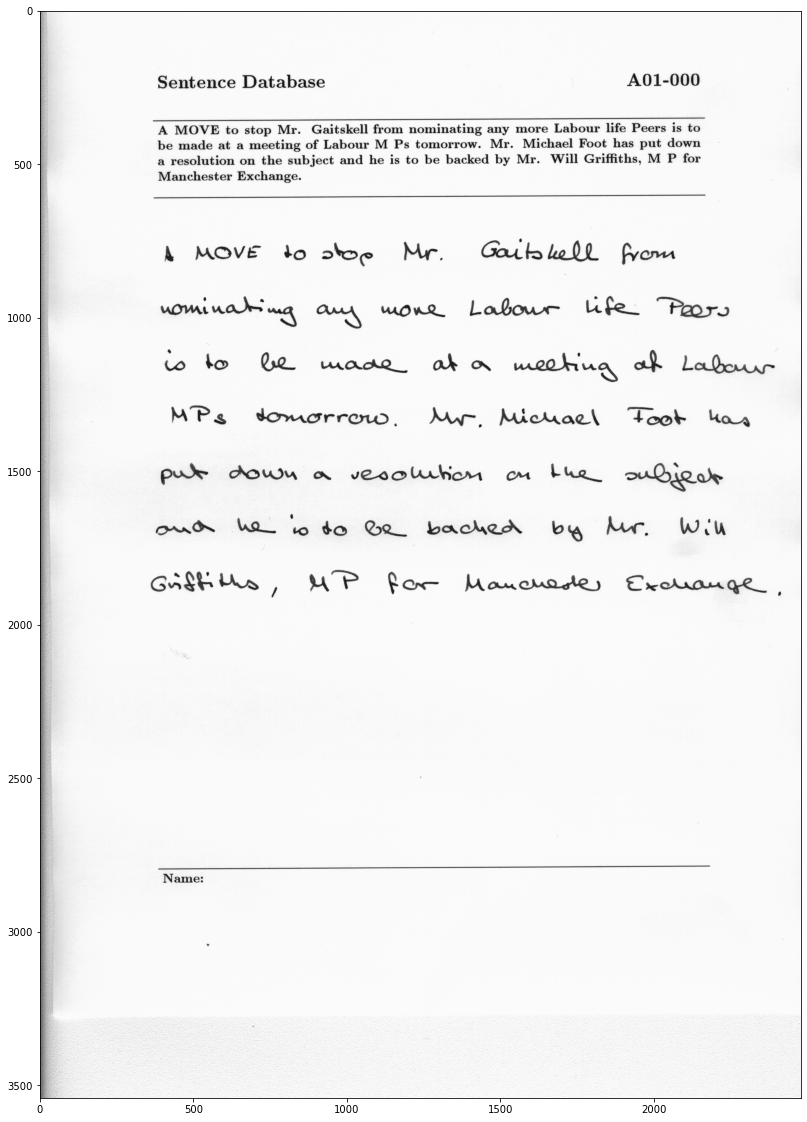

In [30]:
image = cv2.imread('./form.png')
plt.figure(figsize=(20,20))
plt.imshow(image,cmap='Greys_r')
para = getParagraph(image)

lines = getLines(para)
lines = pre_process(lines,(128,1024))
print(lines[0])

In [31]:
lines = pp.normalization(lines)

In [32]:
print(lines.shape)

(7, 1024, 128, 1)


<module 'matplotlib.pyplot' from '/opt/conda/lib/python3.7/site-packages/matplotlib/pyplot.py'>


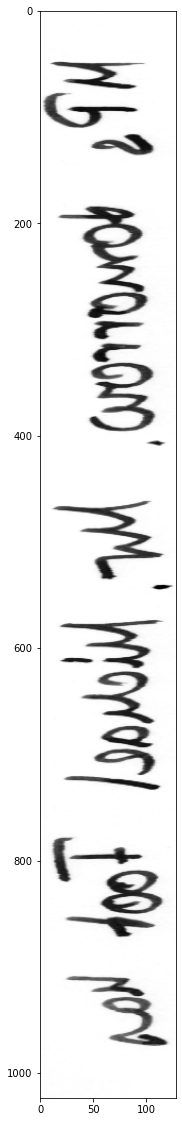

In [33]:
import matplotlib.pyplot as plt
plt.figure(figsize=(20,20))
plt.imshow(np.squeeze(lines[3]),cmap='Greys_r')
print(plt)

In [34]:
print(lines)

[[[[0.40330902]
   [0.40330902]
   [0.38546094]
   ...
   [0.38546094]
   [0.36761287]
   [0.3497648 ]]

  [[0.38546094]
   [0.40330902]
   [0.40330902]
   ...
   [0.31406868]
   [0.33191672]
   [0.38546094]]

  [[0.40330902]
   [0.40330902]
   [0.40330902]
   ...
   [0.3497648 ]
   [0.36761287]
   [0.40330902]]

  ...

  [[0.40330902]
   [0.40330902]
   [0.40330902]
   ...
   [0.2962206 ]
   [0.33191672]
   [0.38546094]]

  [[0.40330902]
   [0.40330902]
   [0.40330902]
   ...
   [0.31406868]
   [0.31406868]
   [0.31406868]]

  [[0.40330902]
   [0.40330902]
   [0.40330902]
   ...
   [0.36761287]
   [0.36761287]
   [0.36761287]]]


 [[[0.39458454]
   [0.37582713]
   [0.37582713]
   ...
   [0.4133419 ]
   [0.4133419 ]
   [0.39458454]]

  [[0.39458454]
   [0.4133419 ]
   [0.4133419 ]
   ...
   [0.4133419 ]
   [0.4133419 ]
   [0.4133419 ]]

  [[0.4133419 ]
   [0.4133419 ]
   [0.39458454]
   ...
   [0.4133419 ]
   [0.4133419 ]
   [0.4133419 ]]

  ...

  [[0.4133419 ]
   [0.4133419 ]
   [0.4

In [35]:
predicts, _ = model.predict(lines)
predicts_ = [dtgen.tokenizer.decode(x[0]) for x in predicts]
predicts

[array([list([44, 29, 20, 17, 1, 17, 20, 31, 19, 30, 96, 3, 96, 53, 96, 49, 26, 29, 96, 50, 12, 25, 14, 32, 16, 15, 16, 96, 42, 35, 14, 19, 12, 25, 18, 16])],
       dtype=object),
 array([list([26, 25, 15, 96, 60, 30, 96, 70, 96, 31, 30, 96, 31, 26, 96, 13, 16, 96, 13, 12, 14, 22, 16, 15, 96, 13, 36, 96, 50, 29, 96, 77, 96, 60, 20, 23, 1, 23])],
       dtype=object),
 array([list([27, 32, 31, 30, 96, 15, 26, 34, 25, 96, 12, 96, 29, 16, 30, 26, 23, 32, 31, 20, 26, 25, 96, 26, 25, 96, 31, 19, 16, 96, 30, 32, 13, 21, 16, 14, 31])],
       dtype=object),
 array([list([50, 53, 30, 96, 15, 26, 24, 26, 27, 1, 27, 12, 25, 34, 96, 50, 29, 96, 50, 20, 14, 25, 12, 16, 23, 96, 43, 12, 30, 31, 96, 19, 12, 30])],
       dtype=object),
 array([list([20, 30, 96, 31, 26, 96, 13, 16, 96, 24, 12, 15, 16, 96, 12, 31, 96, 12, 96, 24, 16, 1, 16, 31, 20, 25, 18, 96, 26, 17, 96, 49, 12, 13, 26, 32, 29])],
       dtype=object),
 array([list([25, 26, 24, 20, 25, 12, 31, 20, 25, 18, 96, 12, 25, 36, 96, 24, 26, 

In [36]:
predicts_

['Griffiths 1 P Lor Mancuede Exchange',
 "ond Ws ' ts to be backed by Mr . Will",
 'puts down a resolution on the subject',
 'MPs domoppanw Mr Micnael Fast has',
 'is to be made at a meeting of Labour',
 'nominating any more Labourn life . Prs',
 'I MOV to stop Mr . Gaitskell from']

In [10]:
print(lines[0])

NameError: name 'lines' is not defined

In [9]:
predicts, _ = model.predict(next(dtgen.next_test_batch()),ctc_decode=True)

predicts = [dtgen.tokenizer.decode(x[0]) for x in predicts]
predicts

[[[255 255 255 ... 255 255 255]
  [255 255 255 ... 255 255 255]
  [255 255 255 ... 255 255 255]
  ...
  [255 255 255 ... 255 255 255]
  [255 255 255 ... 255 255 255]
  [255 255 255 ... 255 255 255]]

 [[255 255 255 ... 255 255 255]
  [255 255 255 ... 255 255 255]
  [255 255 255 ... 255 255 255]
  ...
  [255 255 255 ... 255 255 255]
  [255 255 255 ... 255 255 255]
  [255 255 255 ... 255 255 255]]

 [[255 255 255 ... 255 255 255]
  [255 255 255 ... 255 255 255]
  [255 255 255 ... 255 255 255]
  ...
  [255 255 255 ... 255 255 255]
  [255 255 255 ... 255 255 255]
  [255 255 255 ... 255 255 255]]

 ...

 [[255 255 255 ... 255 255 255]
  [255 255 255 ... 255 255 255]
  [255 255 255 ... 255 255 255]
  ...
  [255 255 255 ... 255 255 255]
  [255 255 255 ... 255 255 255]
  [255 255 255 ... 255 255 255]]

 [[255 255 255 ... 255 255 255]
  [255 255 255 ... 255 255 255]
  [255 255 255 ... 255 255 255]
  ...
  [255 255 255 ... 255 255 255]
  [255 255 255 ... 255 255 255]
  [255 255 255 ... 255 255 2

['qpeite unable to explain why he should feel',
 'meet the Deanes , and as soon as cny had',
 'the harses and drank eprough to cure ur',
 "you not killed ! ' ' Because we know all things , ' the",
 'with the possibility of faubty design . " He held',
 'all due deference , Miss beane - come off it !',
 'It would have been acceptable to all concemed',
 'to make you understard just what happered',
 'course of action should be . First to avoid the',
 'I slamp Department I while sally sulked at - home .',
 'Bill is good man , and Bveno Buck is raised on lake .',
 'Then what of the aulturol life ? Did this per -',
 "nuttered together . ' Do you say that you poor",
 'Jally and of course Mrs Septinus , for surely',
 'did you come from ? " the indge said in',
 '1 urice maniore officer . " Yon wow \' t St fet About winve , \'']

In [35]:
batch = next(dtgen.next_test_batch())

In [37]:
print(batch.shape)
print(lines.shape)

(16, 1024, 128, 1)
(7, 1024, 128, 1)


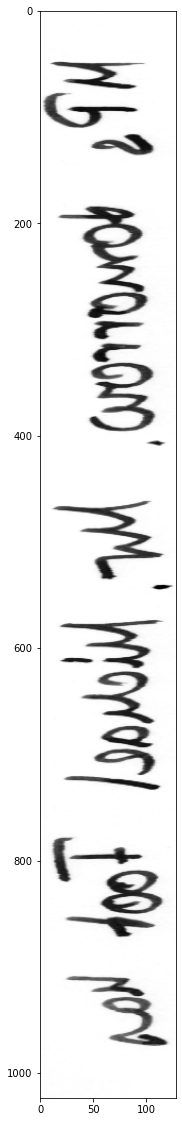

In [38]:
plt.figure(figsize=(20,20))
plt.imshow(np.squeeze(lines[3]),cmap='Greys_r')

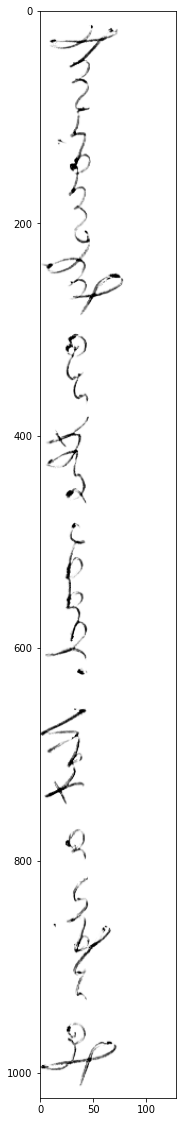

In [39]:
plt.figure(figsize=(20,20))
plt.imshow(np.squeeze(batch[3]),cmap='Greys_r')

In [54]:
print(np.min(batch[10]))

-7.2693872


In [ ]:
plt.figure(figsize=(20,20))
plt.imshow(np.squeeze(lines[3]),cmap='Greys_r')

The predict process is similar to the *predict* of the Keras:

Model Predict
90/90 [==============================] - 2s 21ms/step
CTC Decode
90/90 [==============================] - 60s 666ms/step
(1024, 128)
(1024, 128)
(1024, 128)
(1024, 128)
(1024, 128)
(1024, 128)
(1024, 128)
(1024, 128)
(1024, 128)
(1024, 128)


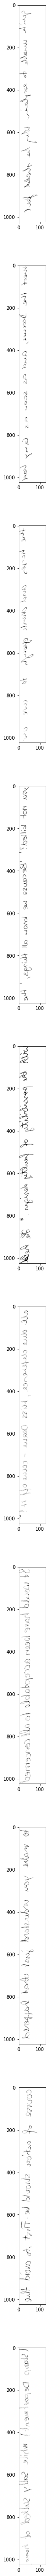

In [12]:
from data import preproc as pp
from IPython.display import display
from PIL import Image
import matplotlib.pyplot as plt
import numpy as np

# from google.colab.patches import cv2_imshow

start_time = datetime.datetime.now()

# predict() function will return the predicts with the probabilities
predicts, _ = model.predict(x=dtgen.next_test_batch(),
                            steps=dtgen.steps['test'],
                            ctc_decode=True,
                            verbose=1)

# decode to string
predicts = [dtgen.tokenizer.decode(x[0]) for x in predicts]

total_time = datetime.datetime.now() - start_time

# mount predict corpus file
with open(os.path.join(output_path, "predict.txt"), "w") as lg:
    for pd, gt in zip(predicts, dtgen.dataset['test']['gt']):
        lg.write(f"TE_L {gt}\nTE_P {pd}\n")
   
# for i, item in enumerate(dtgen.dataset['test']['dt'][:10]):
#     print("=" * 1024, "\n")
#     display(pp.adjust_to_see(item))
#     print(dtgen.dataset['test']['gt'][i])
#     print(predicts[i], "\n")
figs_to_plot = 10
fig,axs = plt.subplots(figs_to_plot,1,figsize=(15,10*figs_to_plot))
for i in range(figs_to_plot):
    image = dtgen.dataset['test']['dt'][i]
    print(image.shape)
    axs[i].imshow(image,cmap='Greys_r')
    

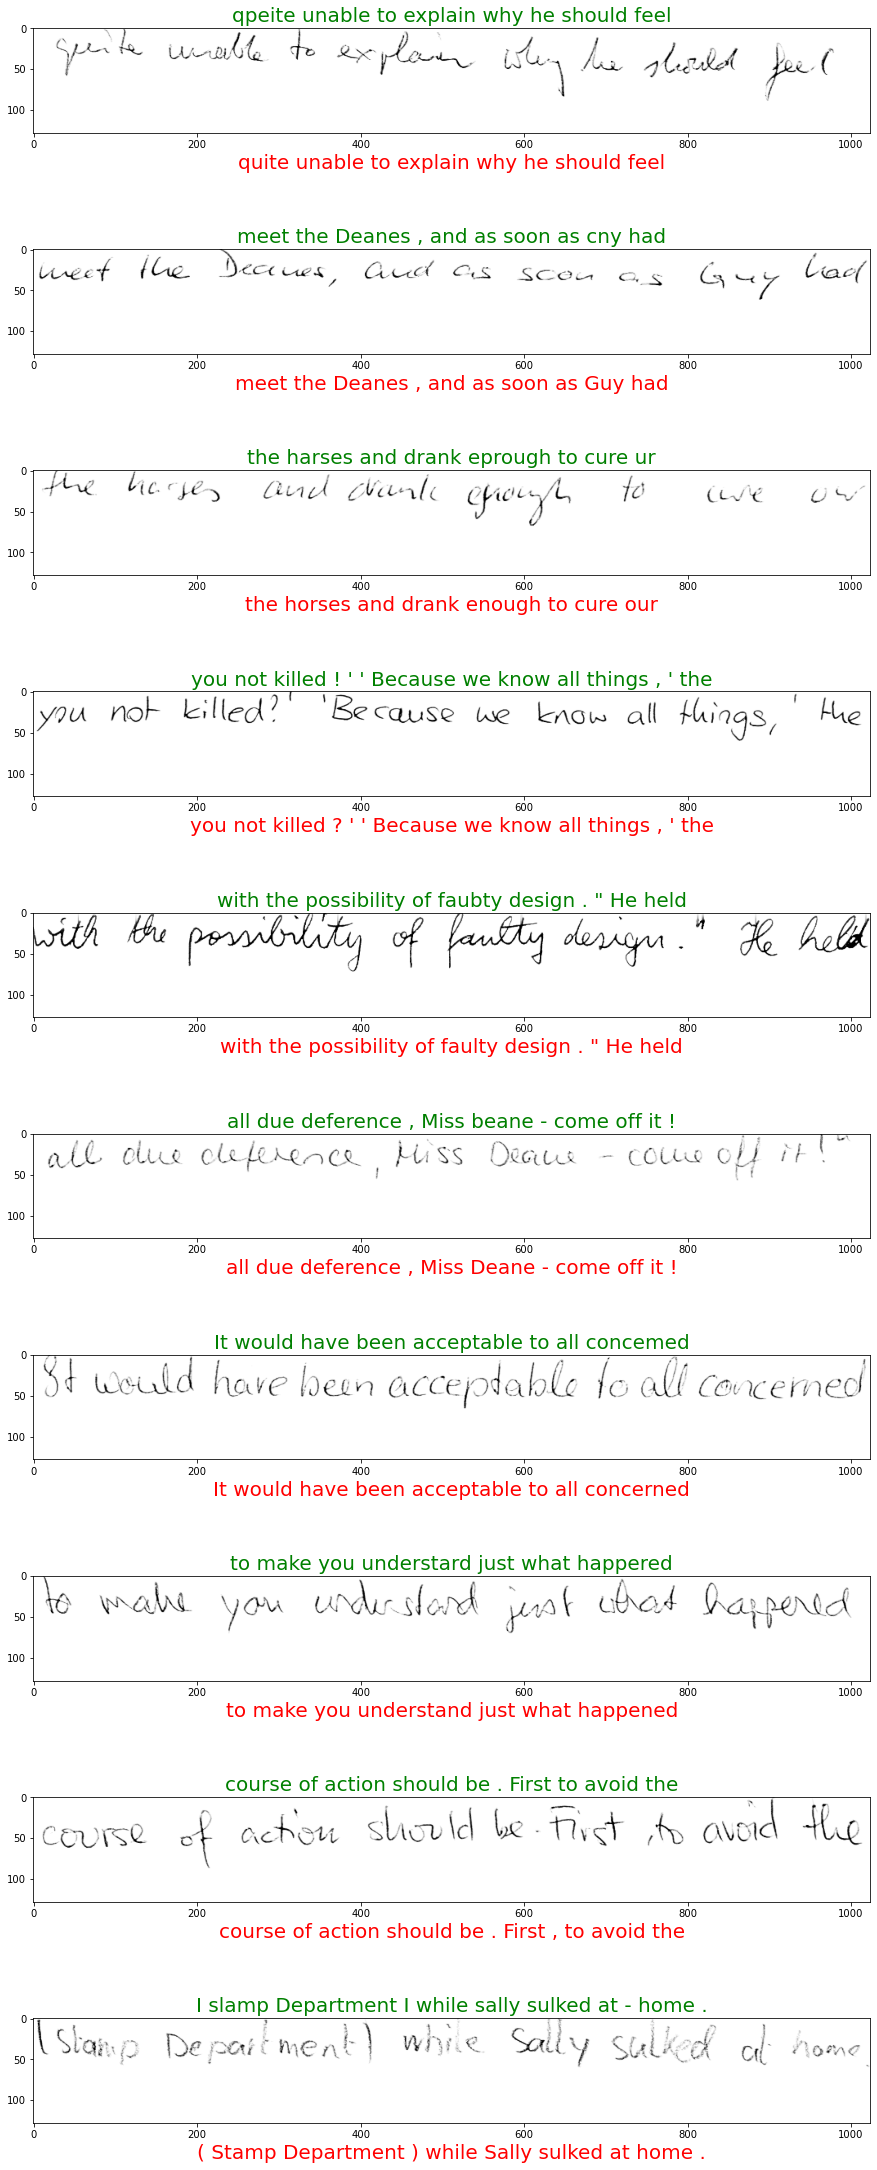

In [13]:
figs_to_plot = 10
fig,axs = plt.subplots(figs_to_plot,1,figsize=(15,4*figs_to_plot))
for i in range(figs_to_plot):
    image = dtgen.dataset['test']['dt'][i]
    axs[i].imshow(pp.adjust_to_see(image),cmap='Greys_r')
    axs[i].set_title(predicts[i],fontsize=20, color = 'green')
    axs[i].set_xlabel(dtgen.dataset['test']['gt'][i],fontsize=20, color = 'red')

## 7 Evaluate

Evaluation process is more manual process. Here we have the `ocr_metrics`, but feel free to implement other metrics instead. In the function, we have three parameters: 

* predicts
* ground_truth
* norm_accentuation (calculation with/without accentuation)
* norm_punctuation (calculation with/without punctuation marks)

In [ ]:
from data import evaluation

evaluate = evaluation.ocr_metrics(predicts=predicts,
                                  ground_truth=dtgen.dataset['test']['gt'])

e_corpus = "\n".join([
    f"Total test images:    {dtgen.size['test']}",
    f"Total time:           {total_time}",
    f"Time per item:        {total_time / dtgen.size['test']}\n",
    f"Metrics:",
    f"Character Error Rate: {evaluate[0]:.8f}",
    f"Word Error Rate:      {evaluate[1]:.8f}",
    f"Sequence Error Rate:  {evaluate[2]:.8f}"
])

with open(os.path.join(output_path, "evaluate.txt"), "w") as lg:
    lg.write(e_corpus)
    print(e_corpus)